# 도미와 빙어 구분하기

In [ ]:
## 전체소스코드
## https://bit.ly/hg-01-3

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


## 데이터 준비하기

In [4]:

## http:/bit.ly/bream_list

bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

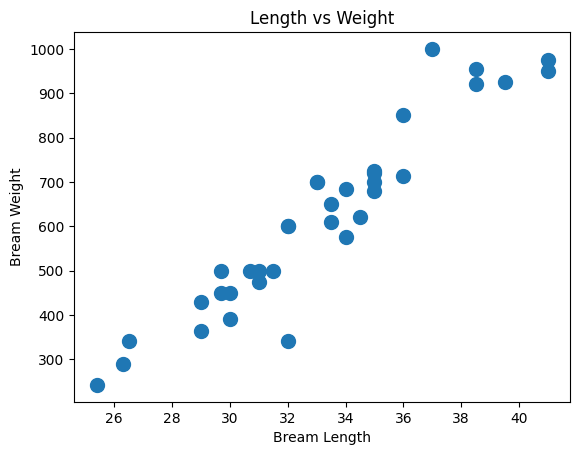

In [11]:
## 산점도 그리기

plt.scatter(bream_length, bream_weight, s = 100)

plt.title("Length vs Weight")
plt.xlabel("Bream Length")
plt.ylabel("Bream Weight")

plt.show()

In [12]:
## http:/bit.ly/smelt_list

smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

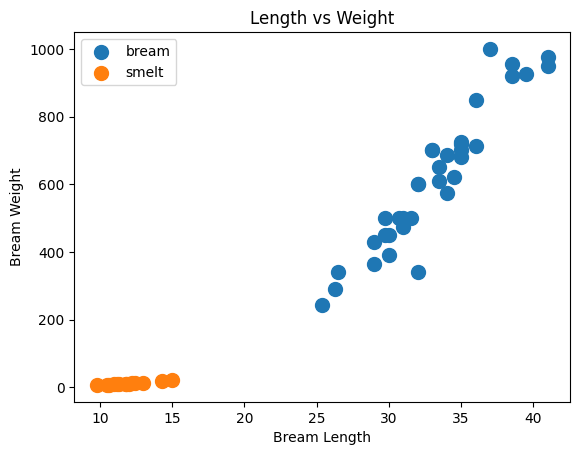

In [17]:
## 도미, 빙어 산점도 동시에 그리기

plt.scatter(bream_length, bream_weight, s = 100, label = "bream")
plt.scatter(smelt_length, smelt_weight, s = 100, label = "smelt")

plt.title("Length vs Weight")
plt.xlabel("Bream Length")
plt.ylabel("Bream Weight")
plt.legend()

plt.show()

## knn (k-최근접 이웃) 을 이용한 분류문제 해결

In [22]:
## 리스트 병합

length = bream_length + smelt_length
weight = bream_weight + smelt_weight


list

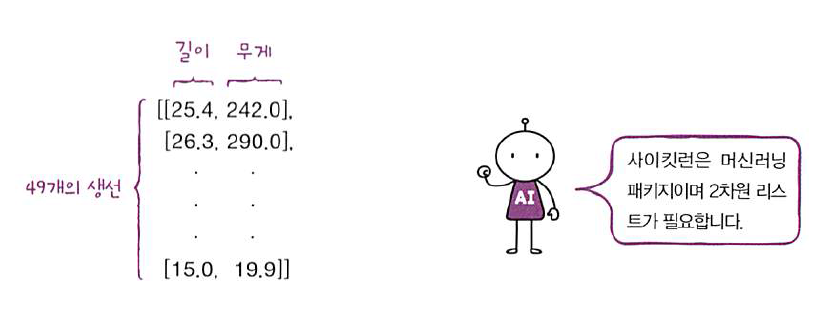

In [1]:
from IPython.display import Image

Image('../fig/bream_list.png')

In [41]:
## sklearn machine 을 위한 2차원 feature 리스트 생성

fish_data = [[l, w] for l, w in zip(length, weight)]

type(fish_data)
np.shape(fish_data)

fish_data[:5]

# fish_data2 = np.column_stack([length, weight])
# fish_data2[:5, :]

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0]]

In [43]:
## 1차원 target list 생성

fish_target = [1]*35 + [0]*14
print(fish_target)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


## KNN 머신러닝을 위한 sklearn package 사용

In [45]:

## import sklearn
# model = sklearn.neighbors.KNeighborsClassifier()

from sklearn.neighbors import KNeighborsClassifier as knc

# from sklearn.neighbors import KNeighborsClassifier
# kn = KNeighborsClassifier()

In [48]:
## knn 객체 생성

kn = knc(n_neighbors=5)

In [49]:
## knn 모델 학습
kn.fit(fish_data, fish_target)

KNeighborsClassifier()

In [51]:
## knn 모델 평가
kn.score(fish_data, fish_target)

1.0

In [53]:
## 새로운 자료에 대한 예측
kn.predict([[30, 600]])

array([1])

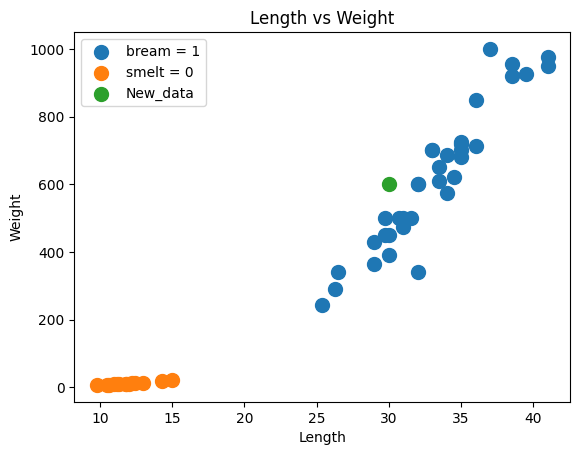

In [60]:
plt.scatter(bream_length, bream_weight, s = 100, label = "bream = 1")
plt.scatter(smelt_length, smelt_weight, s = 100, label = "smelt = 0")
plt.scatter(30, 600, s = 100, label = "New_data")

plt.title('Length vs Weight')
plt.xlabel("Length")
plt.ylabel("Weight")
plt.legend()


plt.show()

## knn의 특징
- Instance-based ML
- 모든 학습자료와 거리를 계산
- 데이터와 feature dimension이 늘어날 수록 계산량이 많아짐, 연산시간 증가



In [68]:
print("학습 feature = {}". format(kn._fit_X))
print("학습 target = {}", kn._y)

학습 feature = [[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]
학습 target = {} [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
## knn underfitting 결과 확인하기

In [73]:
## knn 객체생성

kn49 = knc(n_neighbors=49)

In [79]:
## knn 학습

kn49.fit(fish_data, fish_target)

KNeighborsClassifier(n_neighbors=49)

In [83]:
## knn 학습결과 확인하기

print(kn49.score(fish_data, fish_target))

print(35/49)

0.7142857142857143
0.7142857142857143
